****03.02: моделі****

Визначимо знак функції в залежності від значення аргументів

У моделях є 3 штуки (на прикладі функції с = a x1+b x2-d + l(a^2+b^2)):

Розмірності (Dimensions) - х1, х2, f1, f2

Параметри (Parameters) - a, b, d

Гіперпараметри (hyperparameter) - l (Те, що задається до навчання. Як саме модель буде навчатись)

Для цього прикладу, якщо переробити цю функцію на лінійну регресію, то:

a, b -> w1, w2: weight (ваги) (визначається під час навчання)

x1, x2: features (фічі) (початкові дані)

l: гіперпараметр (задається до навчання)

Сенс навчання: підібрати такі параметри, щоб різниця передбачених та справжніх значень була нулем або наближеним до нуля

In [1]:
from statistics import LinearRegression

from sklearn.preprocessing import PolynomialFeatures


def g(x1,x2):
    c = 2*x1+4*x2-10
    if c<0:
        return -1
    else:
        return 1
print(g(2, 3))

1


In [2]:
print(g(5, -6))

-1


Змінений приклад

In [3]:
def g(x1,x2, a, b, d, e):
    c = a*x1+b*x2+d*(x1**2)-e
    if c<0:
        y_pred = -1
    else:
        y_pred = 1

*Метрика помилки*

MSE - середня квадратична помилка. Сума квадратів різниць передбачених та справжніх значень поділене на кількість доданків

*Лінійна регресія*

Приклад: yi = a*xi + b

y = X*A

y - матриця ігриків, передбачень

X - матриця значень (двовимірна nx2, де друга колонка - одиниці)

A - матриця параметрів (a, b)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

Для прикладу, візьмемо такий графік

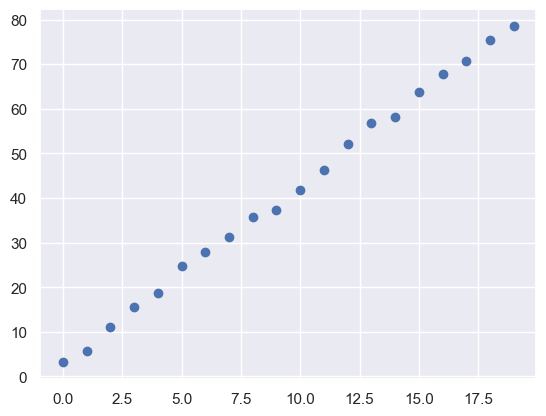

In [5]:
n = 20
X = np.arange(n)
y = 4*X + 3 + np.random.randn(X.size)
plt.scatter(X, y)
plt.show()

Кількість точок координатний прямиї

In [6]:
X.shape

(20,)

In [7]:
y.shape

(20,)

Створюємо вектор стовпчик одиниць

In [8]:
on = np.ones((X.size, 1))
on.shape

(20, 1)

Перетворення Х та вектор стовпчик

In [9]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [10]:
X[:, np.newaxis]

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

Прикріпляємо до Х вектор стовпчик одиниць

In [11]:
X2 = np.hstack((X[:, np.newaxis], on))

In [12]:
X2

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.]])

Перетворення y в вектор стовпчик

In [13]:
y = y[:, np.newaxis]
y.shape

(20, 1)

Розв’язок задачі найменших квадратів для переозначеної системи лінійних рівнянь

In [14]:
a = np.linalg.lstsq(X2, y, rcond=None)

Повернене значення (a) — кортеж із 4 елементів:

a(0) — вектор коефіцієнтів β (розмірністю n × 1), що мінімізує різницю ||X2β - y||.

a(1) — масив квадратів залишків (різниця між передбаченими та реальними значеннями y), якщо m > n, інакше порожній масив.

a(2) — ранг матриці X2.

a(3) — сингулярні числа X2.

In [15]:
type(a)

tuple

In [16]:
a

(array([[4.00909047],
        [3.03508078]]),
 array([18.43069372]),
 np.int32(2),
 array([49.84623483,  2.31362763]))

In [17]:
a[0]

array([[4.00909047],
       [3.03508078]])

In [18]:
y_pred = a[0][0]*X+a[0][1]

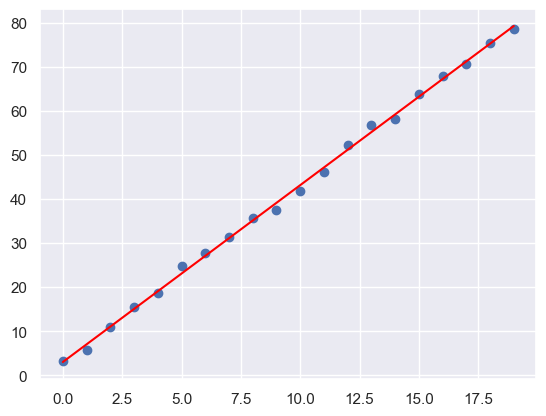

In [19]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

**06.02 Minimum to mean distance classifier**

In [20]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200,centers=2)
X.shape

(200, 2)

In [21]:
y.shape

(200,)

Значення y

In [22]:
np.unique(y)

array([0, 1])

Зображення

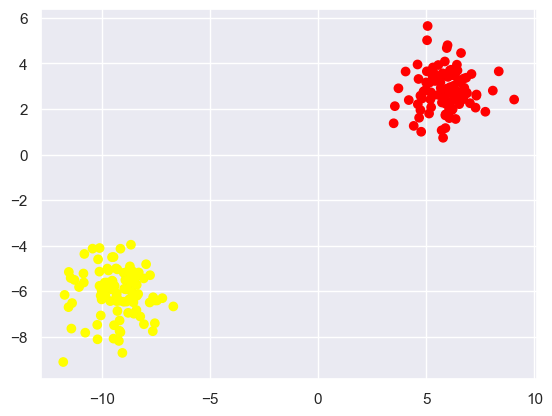

In [28]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

Замінюємо нуль на -1

In [23]:
y[y==0] = -1

In [24]:
np.unique(y)

array([-1,  1])

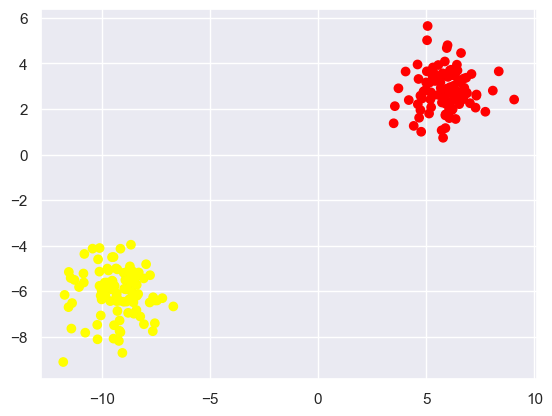

In [27]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

Знаходимо індекси, де клас = 1. Робимо класифікацію вручну

In [29]:
idx = y==1

Ділимо дані

In [30]:
X1 = X[idx,:]
X1.shape

(100, 2)

In [31]:
X2 = X[~idx,:]
X2.shape

(100, 2)

Пошук середніх значень

In [35]:
M1 = X1.mean(axis=0)
M1

array([-9.30655237, -6.08244545])

In [36]:
M2 = X2.mean(axis=0)
M2

array([5.87132648, 2.83865045])

Класифікація

In [70]:
idx  = np.random.randint(y.size)
r = X[idx, :]
d1 = ((r-M1)**2).sum()
d2 = ((r-M2)**2).sum()
if d1<d2:
    print(y[idx],1)
else:
    print(y[idx],-1)

1 1


Overfitting and underfitting. Недонавчання та перенавчання

У машинному навчанні (ML) недонавчання (underfitting) та перенавчання (overfitting) – це дві основні проблеми, пов’язані з узагальнюючою здатністю моделі.

1. Недонавчання (Underfitting)
Недонавчання виникає, коли модель є занадто простою і не може добре відобразити залежності у навчальних даних. Вона не встигає захопити основні закономірності, що призводить до низької точності як на навчальних, так і на тестових даних.

2. Перенавчання (Overfitting)
Перенавчання виникає, коли модель занадто добре підлаштовується під навчальні дані, запам’ятовуючи їх, замість того щоб виявляти загальні закономірності. Це призводить до високої точності на навчальних даних, але поганої генералізації на тестові або реальні дані.

Недонавчання → Модель дає однакові передбачення для всіх випадків, навіть якщо є явний патерн у даних.

Оптимальна модель → Модель добре узагальнює закономірності у даних.

Перенавчання → Модель підлаштовується під шуми або випадкові деталі навчальних даних.

Якщо коротко:
Недонавчання = модель занадто спрощена.

Перенавчання = модель занадто складна.

Оптимальна модель = баланс між двома крайнощами.

Приклад оптимальної моделі

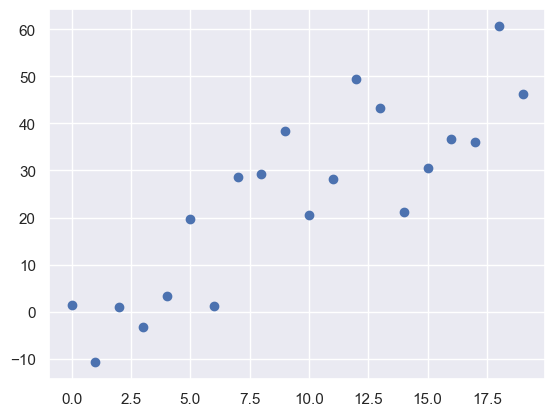

In [71]:
n = 20
X = np.arange(n)
y = 3*X-4+10*(np.random.randn(X.size))
plt.scatter(X, y)

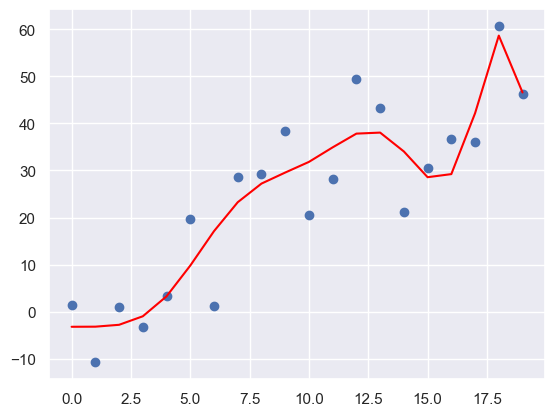

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polyModel = PolynomialFeatures(degree=12)
X_poly = polyModel.fit_transform(X[:, np.newaxis])
m = LinearRegression()
m.fit(X_poly, y)
y_pred = m.predict(X_poly)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

Приклад перенавчання (мало навчальних даних)

Спочатку навчимо модель на малій кількості даних

In [105]:
n = 20
X = np.arange(n)
y = 3*X-4+10*(np.random.randn(X.size))

X2 = X[0:n:5]
y2 = y[0:n:5]

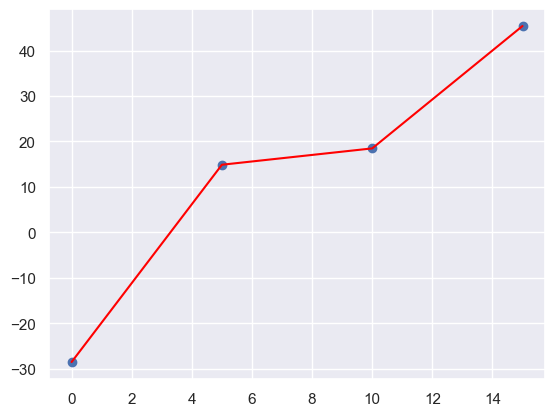

In [106]:
polyModel = PolynomialFeatures(degree=4)
X_poly = polyModel.fit_transform(X2[:, np.newaxis])
m = LinearRegression()
m.fit(X_poly, y2)
y_pred = m.predict(X_poly)
plt.scatter(X2, y2)
plt.plot(X2, y_pred, color='red')

Потім дамо багато даних

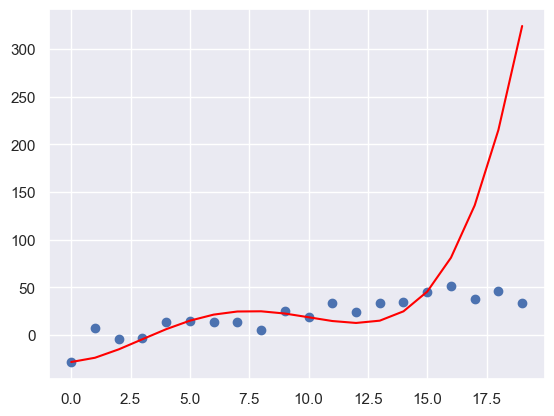

In [107]:
X_poly_all = polyModel.fit_transform(X[:, np.newaxis])
y_pred_all = m.predict(X_poly_all)
plt.scatter(X, y)
plt.plot(X, y_pred_all, color='red')

Перетворення масиву у одновимірний вектор

In [108]:
X = np.asarray([-np.random.rand(50), np.random.rand(50)])
X.shape

(2, 50)

In [109]:
X = X.flatten()
X.shape

(100,)

In [111]:
X = np.sort(X)
X

array([-0.9901882 , -0.92925315, -0.87502506, -0.87259568, -0.86094274,
       -0.83279962, -0.78947257, -0.78380808, -0.78315916, -0.74412411,
       -0.74141752, -0.67679521, -0.67499482, -0.66424629, -0.65341704,
       -0.64897638, -0.60969317, -0.58837325, -0.55217168, -0.53451775,
       -0.49892491, -0.49626918, -0.48886561, -0.44995023, -0.4412826 ,
       -0.3550871 , -0.32982464, -0.32204158, -0.31112596, -0.30317282,
       -0.3017778 , -0.29702503, -0.2929192 , -0.29008046, -0.28834703,
       -0.27700794, -0.26781283, -0.24157805, -0.2399045 , -0.23960294,
       -0.22000088, -0.20766719, -0.19798956, -0.19576321, -0.19398661,
       -0.13208201, -0.12256256, -0.09380496, -0.04967355, -0.02152289,
        0.01003095,  0.01179553,  0.01554071,  0.08103705,  0.08145015,
        0.12327847,  0.13657206,  0.18775335,  0.19445517,  0.20498108,
        0.21120965,  0.22593438,  0.23782402,  0.2751189 ,  0.32529489,
        0.3464447 ,  0.35313915,  0.40858752,  0.41812059,  0.41

Робимо поліном з лайна та палок. Як за допомогою підкрутки масиву а змінювати лінію

In [123]:
a = [3, 10, 100, 1, 100, 0.1]
y = 0
for i in range (0, 6):
    y += a[5-i] * (X ** i)

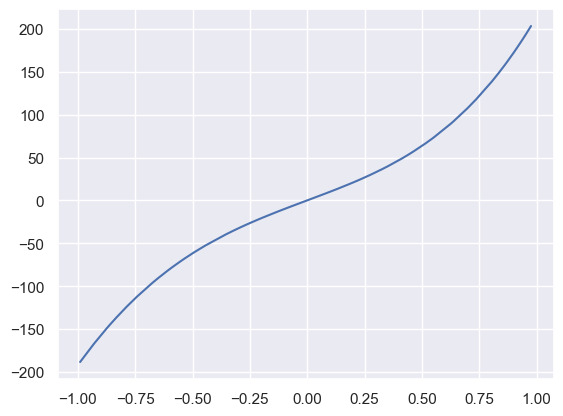

In [124]:
plt.plot(X, y)

Типи наборів даних у машинному навчанні
У машинному навчанні набори даних поділяються за призначенням.

1. Навчальний набір (Training Set)
Використовується для навчання моделі.
Містить мітки (у випадку supervised learning).
Модель "бачить" ці дані і підлаштовує свої параметри.

🔹 Приклад: набір зображень котів і собак, де кожне зображення має відповідну мітку.


2. Валідаційний набір (Validation Set)
Використовується для налаштування гіперпараметрів моделі.
Не використовується безпосередньо для навчання.
Допомагає вибрати найкращі параметри (наприклад, розмір нейронної мережі, швидкість навчання).

🔹 Приклад: підбір коефіцієнта регуляризації в моделі нейронної мережі.


3. Тестовий набір (Test Set)
Використовується для оцінки фінальної якості моделі.
Набір даних, який модель раніше не бачила.
Дає змогу оцінити узагальнюючу здатність моделі.

🔹 Приклад: набір реальних відгуків користувачів для перевірки точності класифікації.